# 모델평가
#### - 머신러닝 모델은 여러가지 방법으로 예측 성능을 평가
#### 성능 평가지표는 일반적으로 모델이나 분류나 회귀냐에 따라 달라지게 됨
- 회귀 : 대부분 실제와 예측값의 차이인 오차 평균값에 기반
- 분류 : 예측변수(종속변수)가 0 혹은 1, 긍정/부정과 같이 이진 분류에서 정확도 이외에 다른 성능평가 시도

# 오차행렬/혼동행렬(Confusion Matrix)
#### -분류 문제에서 예측 오류가 얼마인지, 어떤 유형의 오류가 발생하고 있는지를 함께 나타내는 지표
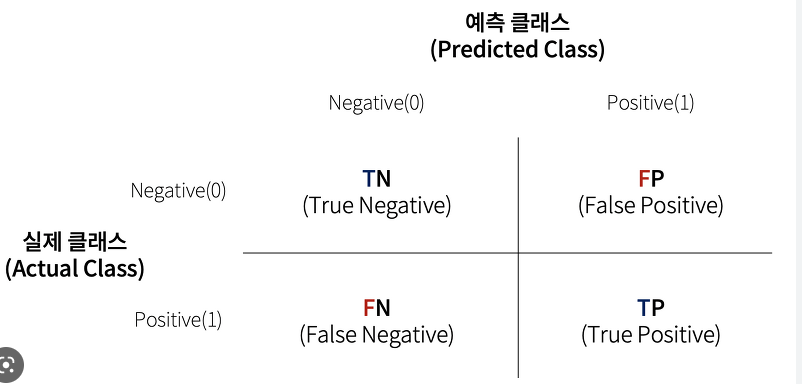
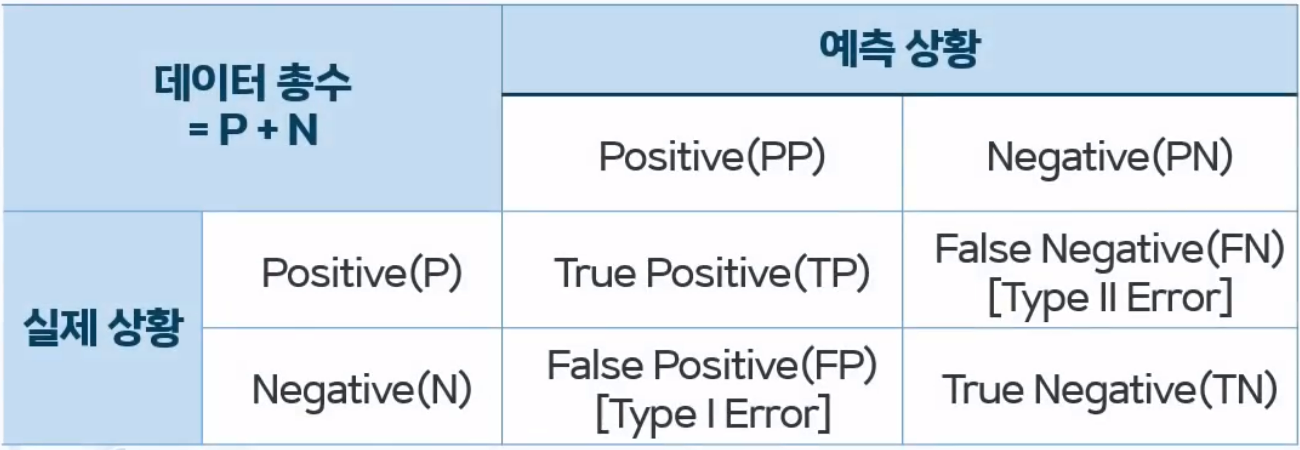

## TP / TN / FN / FP 네가지로 행렬을 만들 수 있음



In [4]:
from sklearn.metrics import confusion_matrix

# 실제 값과 예측 값
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0, 1, 0, 0, 0]

# 오차행렬 계산
cm = confusion_matrix(y_true, y_pred)

# 결과 출력
print("Confusion matrix:\n", cm)


Confusion matrix:
 [[4 1]
 [2 3]]


In [21]:
cm[1,0]

2

In [22]:
cm[1,1] / cm[1,0] + cm[1,1] 

4.5

#### 위 결과에서, 0과 1로 레이블링된 클래스를 분류하는 모델에서
- 0 클래스를 예측한 경우 4개가 맞았고 1개가 틀렸으며, 
- 1 클래스를 예측한 경우 3개가 맞았고 2개가 틀렸다는 것을 나타냅니다. 
#### 이를 통해 모델의 분류 성능을 평가할 수 있습니다.

## 정확도(Accuracy)
- 예측한 전체 데이터들 중에 정확히 예측한 데이터 수의 비율

$$
Accuracy = \frac{TP+TN}{ TP+TN+FP+FN}
$$

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.7

## 에러율(Error rate)
- 예측한 전체 데이터들 중에 잘못 예측한 데이터 수의 비율

$$
Errorrate = \frac{FP+FN}{TP+TN+FP+FN}
$$

In [14]:
error_rate = (cm[0,1] + cm[1,0]) / cm.sum()
error_rate

0.3

## 정밀도(Precision)
- 양성으로 예측한 데이터들 중에 실제로 양성인 데이터의 비율

$$
Precision = \frac{TP}{TP+FP}
$$

In [11]:
from sklearn.metrics import precision_score

precision_score(y_true, y_pred)

0.75

## 재현율(Recall)
- 실제로 양성인 데이터를 양성으로 정확히 예측한 경우의 비율

$$
Recall = \frac{TP}{TP+FN}
$$

In [12]:
from sklearn.metrics import recall_score

recall_score(y_true, y_pred)

0.6

## 특이도(Specificity)
- 실제로 음성인 데이터를 음성으로 정확히 예측한 경우의 비율

$$
Recall = \frac{TN}{FP+TN}
$$

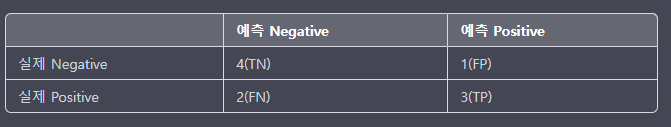

In [26]:
cm

array([[4, 1],
       [2, 3]], dtype=int64)

$$\text{Specificity} = \frac{\text{True Negative}}{\text{True Negative + False Positive}} = \frac{4}{4+1} = 0.8$$

In [25]:
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

Specificity: 0.8


# ROC
ROC 곡선은 이진 분류 모델의 성능을 평가하는 방법 중 하나로, FPR(False Positive Rate) 대비 TPR(True Positive Rate)의 곡선
- AUC 값이 클수록 좋음(면적)

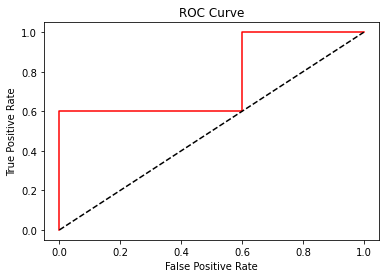

In [27]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 양성 클래스의 확률 예측값 추출
y_score = [0.2, 0.8, 0.4, 0.6, 0.3, 0.1, 0.7, 0.5, 0.4, 0.3]

# fpr, tpr, thresholds 계산
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# ROC 곡선 그리기
plt.plot(fpr, tpr, 'r-')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC 값

In [28]:
from sklearn.metrics import roc_auc_score

# 양성 클래스의 확률 예측값 추출
y_score = [0.2, 0.8, 0.4, 0.6, 0.3, 0.1, 0.7, 0.5, 0.4, 0.3]

# AUC 계산
auc = roc_auc_score(y_true, y_score)

# 결과 출력
print("AUC:", auc)


AUC: 0.76
